# Comparison of models to predict sells

## Introduction 


We try some easy models to predict the sells of "a famous milk company". 
We study the impact of the MAPE metric with some plots.
We'll also try to see the differences between a time model like ARIMA and usual models like XGB,RF or Gradient Boosting. 
Unfortunately, data are private and not acessible.

The data is made of informations about :
- the supermarket seller : Enseigne
- the date of the observations : Week, Year, Date
- the type of product sold : MK1 
- the type of discount : Meca and Pack
- the amount of discount : Plage
- the number of days the discount is in the supermarket : Days_uplifts

In [251]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from math import sqrt
import matplotlib
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
df=pd.read_excel('/Users/newuser/Downloads/Waters.xlsx')
df=df.sort_values(by='Date')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 0 to 4722
Data columns (total 12 columns):
Client 4        8685 non-null object
Enseigne        8685 non-null object
Date            8685 non-null float64
Week            8685 non-null int64
Year            8685 non-null int64
MG1             8685 non-null object
Sell_Out        8685 non-null float64
Theme           2963 non-null object
Mecanisme       2963 non-null object
Pack            2963 non-null object
Days_Uplifts    2963 non-null float64
Plage           2963 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 882.1+ KB


In [80]:
df2=df.drop(['Theme','Client 4','Date'],axis=1)
df2.shape

(8685, 9)

In [81]:
new_df=pd.get_dummies(df2['Enseigne'],prefix='Ens')
new_df2=pd.get_dummies(df2['MG1'],prefix='MG1')
new_df3=pd.get_dummies(df2['Mecanisme'],prefix='Meca',dummy_na=True)
new_df4=pd.get_dummies(df2['Pack'],prefix='Pack',dummy_na=True)


In [82]:
int_df1 = pd.concat([new_df,new_df2],axis=1)
int_df2 = pd.concat([new_df3,new_df4],axis=1)
int_df = pd.concat([int_df1,int_df2],axis=1)
new_df=pd.concat([int_df,df2],axis=1)
new_df.shape

(8685, 33)

In [83]:
new_df=new_df.drop(['Enseigne','MG1','Mecanisme','Pack'],axis=1)
new_df=new_df.fillna(0)
new_df.shape

(8685, 29)

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 0 to 4722
Data columns (total 29 columns):
Ens_Auchan                  8685 non-null uint8
Ens_Carrefour               8685 non-null uint8
Ens_Carrefour Market        8685 non-null uint8
Ens_Casino SM               8685 non-null uint8
Ens_Cora                    8685 non-null uint8
Ens_Geant                   8685 non-null uint8
Ens_Monoprix                8685 non-null uint8
Ens_SM Match  Prospectus    8685 non-null uint8
Ens_Systeme U               8685 non-null uint8
MG1_F0W                     8685 non-null uint8
MG1_F56                     8685 non-null uint8
MG1_F8M                     8685 non-null uint8
MG1_FHG                     8685 non-null uint8
MG1_VR3                     8685 non-null uint8
Meca_Cagnottage             8685 non-null uint8
Meca_Lots Virtuels          8685 non-null uint8
Meca_Multiple               8685 non-null uint8
Meca_RI                     8685 non-null uint8
Meca_nan                    8

In [252]:
new_df_train=new_df[new_df['Year']<2017]
new_df_test=new_df[new_df['Year']>=2017]
Y_train=new_df_train['Sell_Out']
Y_test=new_df_test['Sell_Out']
new_df_train=new_df_train.drop('Sell_Out',axis=1)
new_df_test=new_df_test.drop('Sell_Out',axis=1)
new_df_train.head()

,Ens_Auchan,Ens_Carrefour,Ens_Carrefour Market,Ens_Casino SM,Ens_Cora,Ens_Geant,Ens_Monoprix,Ens_SM Match Prospectus,Ens_Systeme U,MG1_F0W,...,Meca_nan,Pack_1 pack,Pack_2 packs,Pack_3 packs,Pack_autre,Pack_nan,Week,Year,Days_Uplifts,Plage
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,2014,0.0,0.0
25,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,2014,0.0,0.0
26,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,2014,2.0,0.3
27,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,2014,0.0,0.0
28,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,2014,0.0,0.0


Lets predict the 2017 sells, training the model with the 2014-2016 sells

In [113]:
rfg=RandomForestRegressor(n_estimators=10, criterion='mae')
rfg_fitted=rfg.fit(new_df_train,Y_train)

In [203]:
from sklearn import metrics
def rmse(predictions,true_y):
    return(np.sqrt(((predictions - true_y) ** 2).mean()))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

---------On test set---------
RMSE = 117715.01359624295
MAPE = 29.359843983470395
MAE= 48655.84711934154
MSE= 13856824425.963669
R2= 0.7823548242718925


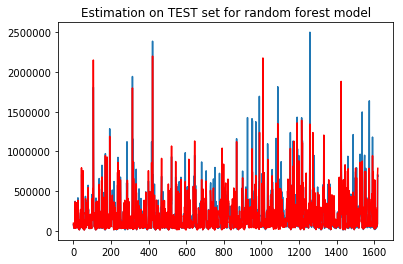

In [223]:
y_pred=rfg_fitted.predict(new_df_test)
print('---------On test set---------')

print('RMSE = {}'.format(rmse(y_pred,Y_test)))
print('MAPE = {}'.format(mean_absolute_percentage_error(Y_test, y_pred)))
print('MAE= {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE= {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('R2= {}'.format(metrics.r2_score(Y_test, y_pred)))

pyplot.plot(np.array(Y_test))
pyplot.plot(y_pred, color='red')
pyplot.title('Estimation on TEST set for random forest model')
pyplot.show()

---------On train set---------
RMSE = 55675.878106542994
MAPE = 10.69092968396426
MAE= 18764.766890776125
MSE= 3099803402.9346495
R2= 0.9419021031428401


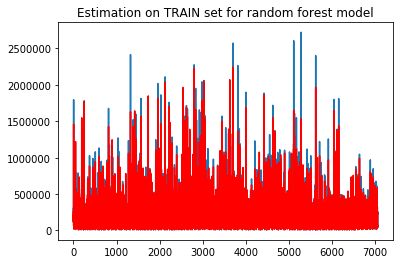

In [227]:
y_pred=rfg_fitted.predict(new_df_train)
print('---------On train set---------')
print('RMSE = {}'.format(rmse(y_pred,Y_train)))
print('MAPE = {}'.format(mean_absolute_percentage_error(Y_train, y_pred)))
print('MAE= {}'.format(metrics.mean_absolute_error(Y_train, y_pred)))
print('MSE= {}'.format(metrics.mean_squared_error(Y_train, y_pred)))
print('R2= {}'.format(metrics.r2_score(Y_train, y_pred)))

pyplot.plot(np.array(Y_train))
pyplot.plot(y_pred, color='red')
pyplot.title('Estimation on TRAIN set for random forest model')
pyplot.show()

In [228]:
df_var_importance=pd.DataFrame({'name_variable':new_df.drop('Sell_Out',axis=1).columns,'score (the higher the better)':rfg_fitted.feature_importances_})
df_var_importance.sort_values(by=['score (the higher the better)'])

,name_variable,score (the higher the better)
22,Pack_autre,0.000421
18,Meca_nan,0.000498
21,Pack_3 packs,0.000845
16,Meca_Multiple,0.000880
23,Pack_nan,0.001962
3,Ens_Casino SM,0.003299
17,Meca_RI,0.003655
6,Ens_Monoprix,0.004662
14,Meca_Cagnottage,0.005685
4,Ens_Cora,0.005758


In [229]:
from sklearn.ensemble import GradientBoostingRegressor

In [230]:
GBR=GradientBoostingRegressor(loss='lad',n_estimators=100)
GBR_fitted=GBR.fit(new_df_train,Y_train)

---------On test set---------
RMSE = 184782.19279949236
MAPE = 25.801748613786714
MAE= 69564.85315992413
MSE= 34144458775.788765
R2= 0.4637027574316793


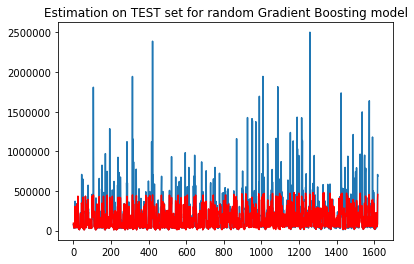

In [231]:
y_pred=GBR_fitted.predict(new_df_test)
print('---------On test set---------')
print('RMSE = {}'.format(rmse(y_pred,Y_test)))
print('MAPE = {}'.format(mean_absolute_percentage_error(Y_test, y_pred)))
print('MAE= {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE= {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('R2= {}'.format(metrics.r2_score(Y_test, y_pred)))

pyplot.plot(np.array(Y_test))
pyplot.plot(y_pred, color='red')
pyplot.title('Estimation on TEST set for random Gradient Boosting model')
pyplot.show()

---------On train set---------
RMSE = 164158.42144998253
MAPE = 25.504648957719873
MAE= 58840.74890576142
MSE= 26947987332.950123
R2= 0.49492881158347624


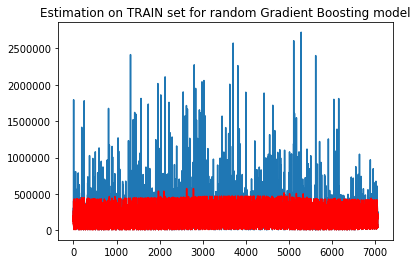

In [233]:
y_pred=GBR_fitted.predict(new_df_train)
print('---------On train set---------')
print('RMSE = {}'.format(rmse(y_pred,Y_train)))
print('MAPE = {}'.format(mean_absolute_percentage_error(Y_train, y_pred)))
print('MAE= {}'.format(metrics.mean_absolute_error(Y_train, y_pred)))
print('MSE= {}'.format(metrics.mean_squared_error(Y_train, y_pred)))
print('R2= {}'.format(metrics.r2_score(Y_train, y_pred)))

pyplot.plot(np.array(Y_train))
pyplot.plot(y_pred, color='red')
pyplot.title('Estimation on TRAIN set for random Gradient Boosting model')
pyplot.show()

In [250]:
df_var_importance=pd.DataFrame({'name_variable':new_df.drop('Sell_Out',axis=1).columns,'score (the higher the better)':GBR_fitted.feature_importances_})
df_var_importance.sort_values(by=['score (the higher the better)'])

,name_variable,score (the higher the better)
18,Meca_nan,0.000000
23,Pack_nan,0.000000
16,Meca_Multiple,0.000000
22,Pack_autre,0.000000
15,Meca_Lots Virtuels,0.000773
17,Meca_RI,0.000996
19,Pack_1 pack,0.001092
20,Pack_2 packs,0.001225
14,Meca_Cagnottage,0.008084
21,Pack_3 packs,0.013261


In [240]:
import xgboost

In [241]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [243]:
xgb_fitted=xgb.fit(new_df_train,Y_train)

---------On test set---------
RMSE = 115259.57414401288
MAPE = 33.82841186749228
MAE= 50378.63901668594
MSE= 13284769431.85922
R2= 0.7913399283542332


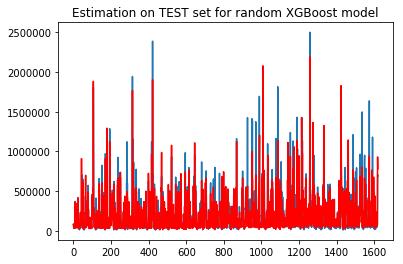

In [246]:
y_pred=xgb_fitted.predict(new_df_test)
print('---------On test set---------')
print('RMSE = {}'.format(rmse(y_pred,Y_test)))
print('MAPE = {}'.format(mean_absolute_percentage_error(Y_test, y_pred)))
print('MAE= {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE= {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('R2= {}'.format(metrics.r2_score(Y_test, y_pred)))

pyplot.plot(np.array(Y_test))
pyplot.plot(y_pred, color='red')
pyplot.title('Estimation on TEST set for random XGBoost model')
pyplot.show()

---------On train set---------
RMSE = 67893.63750006132
MAPE = 25.90654266830981
MAE= 31675.86180229574
MSE= 4609546012.989739
R2= 0.9136058343030806


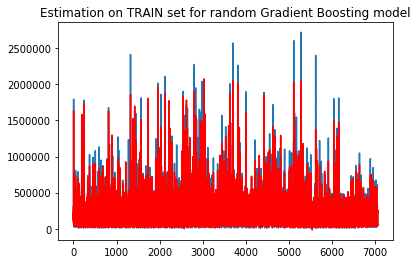

In [248]:
y_pred=xgb_fitted.predict(new_df_train)
print('---------On train set---------')
print('RMSE = {}'.format(rmse(y_pred,Y_train)))
print('MAPE = {}'.format(mean_absolute_percentage_error(Y_train, y_pred)))
print('MAE= {}'.format(metrics.mean_absolute_error(Y_train, y_pred)))
print('MSE= {}'.format(metrics.mean_squared_error(Y_train, y_pred)))
print('R2= {}'.format(metrics.r2_score(Y_train, y_pred)))

pyplot.plot(np.array(Y_train))
pyplot.plot(y_pred, color='red')
pyplot.title('Estimation on TRAIN set for random Gradient Boosting model')
pyplot.show()

In [249]:
df_var_importance=pd.DataFrame({'name_variable':new_df.drop('Sell_Out',axis=1).columns,'score (the higher the better)':xgb_fitted.feature_importances_})
df_var_importance.sort_values(by=['score (the higher the better)'])

,name_variable,score (the higher the better)
23,Pack_nan,0.000000
18,Meca_nan,0.001355
21,Pack_3 packs,0.003614
22,Pack_autre,0.004856
16,Meca_Multiple,0.006550
3,Ens_Casino SM,0.008357
6,Ens_Monoprix,0.008583
17,Meca_RI,0.008809
20,Pack_2 packs,0.008922
7,Ens_SM Match Prospectus,0.009373


# Conslusion :

 A first conclusion can be made about the non effectiveness of the MAPE metric to estimate the accuracy of the model and can be seen thanks to the graph of test prediction of sells.